In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [28]:
num_columns = []
cat_columns = []
for i in df.columns:
    if df[i].dtypes == 'object':
        cat_columns.append(i)
    else:
        num_columns.append(i)

In [29]:
num_columns

['age', 'bmi', 'children', 'expenses']

In [30]:
cat_columns

['sex', 'smoker', 'region']

In [33]:
for i in cat_columns:
    print(df[i].value_counts())
    print("+++++++++++++++")

sex
male      676
female    662
Name: count, dtype: int64
+++++++++++++++
smoker
no     1064
yes     274
Name: count, dtype: int64
+++++++++++++++
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
+++++++++++++++


In [42]:
df[num_columns].corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [47]:
from sklearn.preprocessing import OrdinalEncoder

In [66]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [55]:
smoker = ['smoker']
ord=OrdinalEncoder()

In [60]:
smokerdata=ord.fit_transform(df[['smoker']])

In [62]:
type(smokerdata)

numpy.ndarray

In [65]:
smokerdf=pd.DataFrame(smokerdata)
smokerdf.value_counts()

0.0    1064
1.0     274
Name: count, dtype: int64

region vs expenses 

In [68]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [71]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: xlabel='region', ylabel='expenses'>

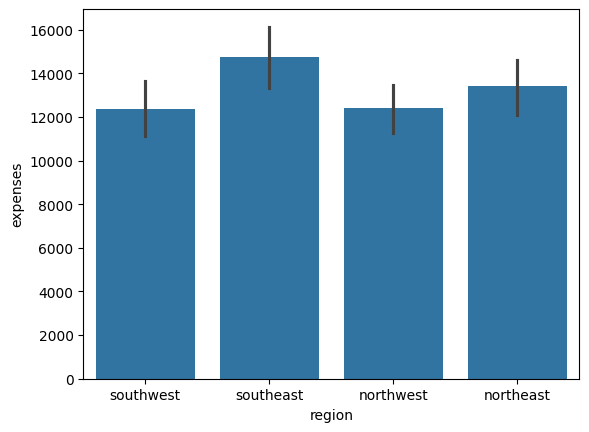

In [84]:
 sns.barplot(x=df['region'],y=df['expenses'])

southwest


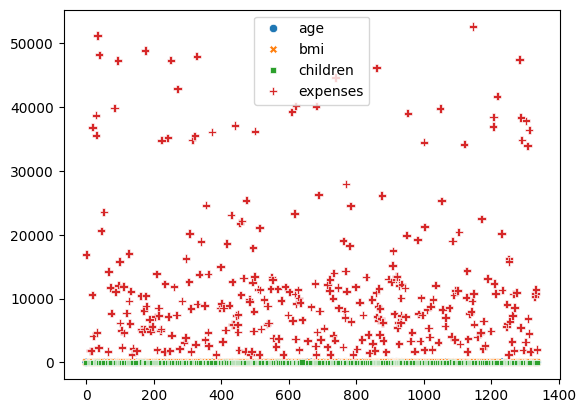

southeast


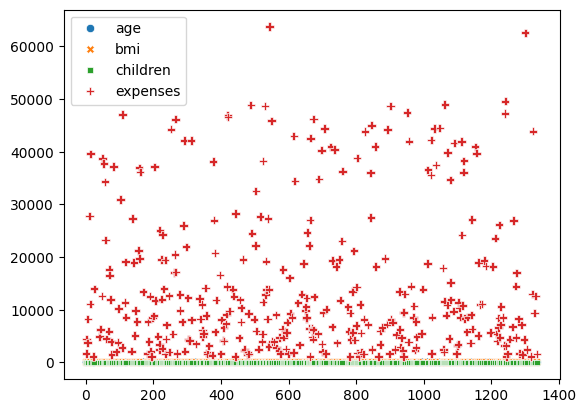

northwest


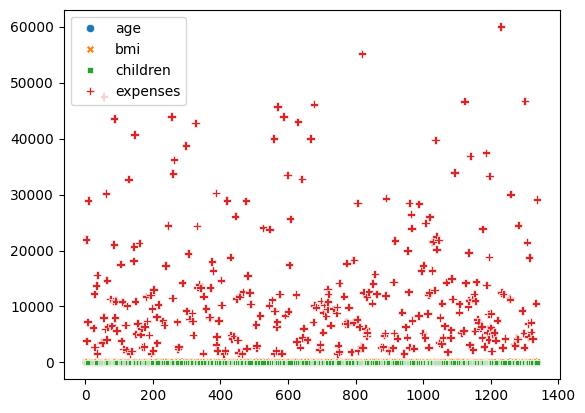

northeast


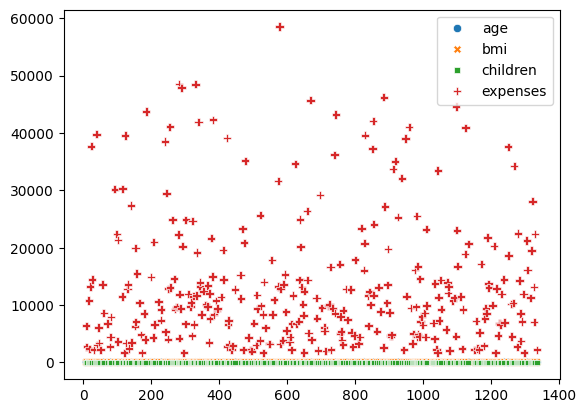

In [86]:
for i in df['region'].unique():
    print(i)
    sns.scatterplot(df[df['region']==i])
    plt.show()

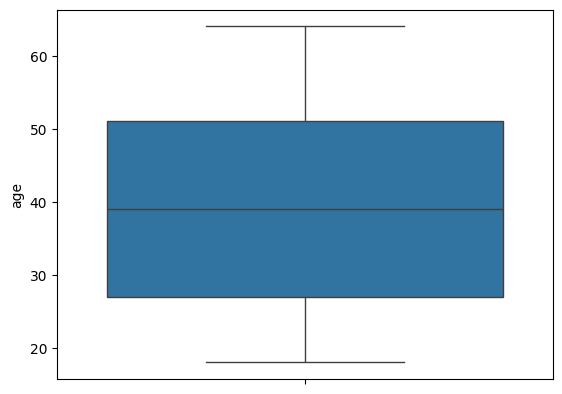

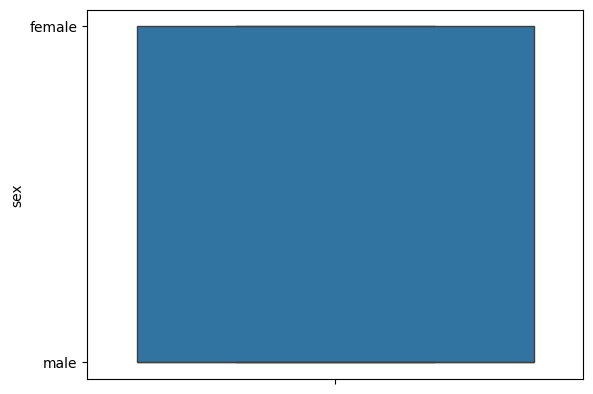

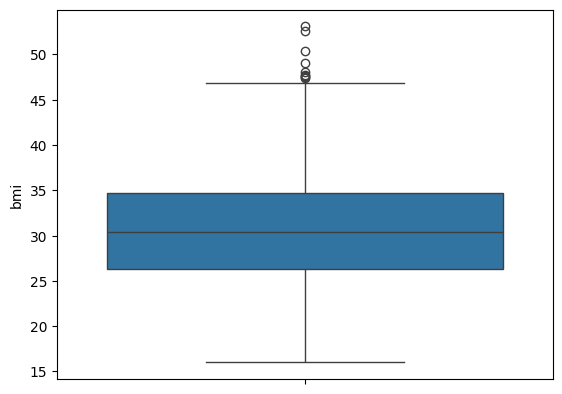

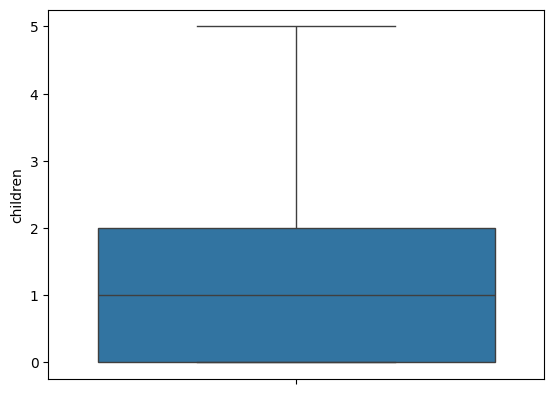

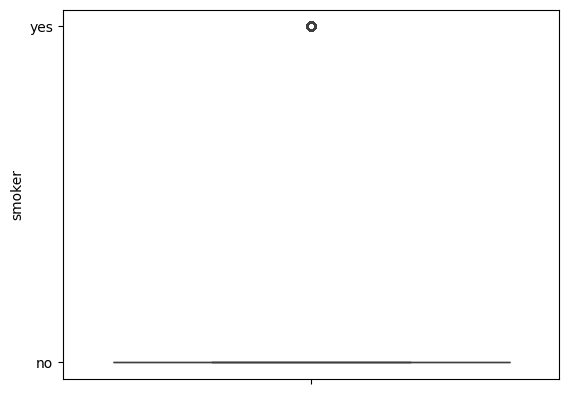

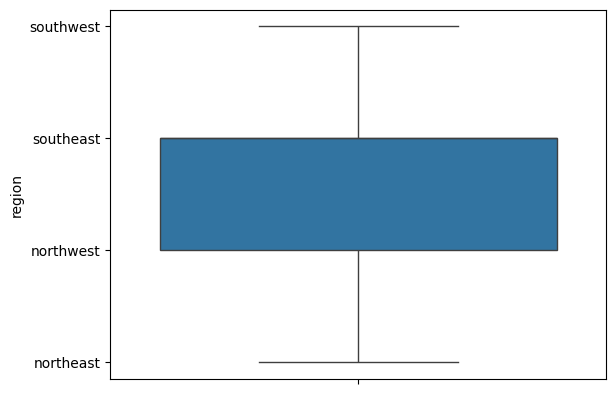

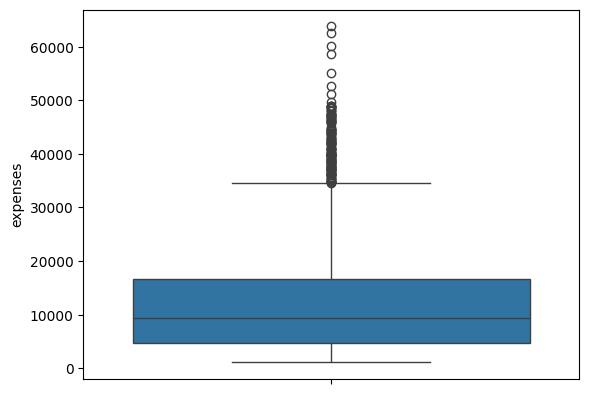

In [90]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

smoker vs expenses 

<Axes: xlabel='smoker', ylabel='expenses'>

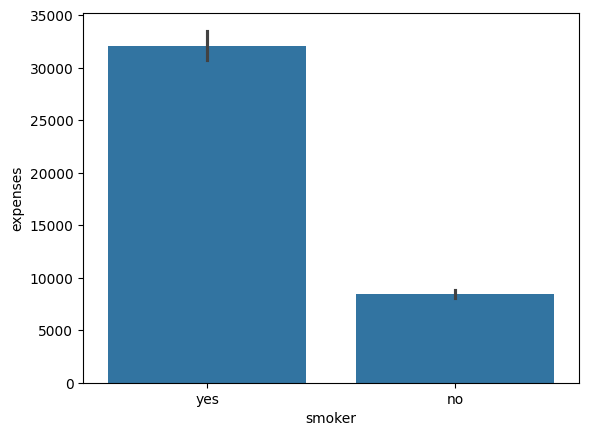

In [93]:
sns.barplot(x=df['smoker'],y=df['expenses'])

conclusion : if a person is smoker then his insurance expenses will be higher and for non smoker the expenses becomes lesser as compared. 

<Axes: xlabel='children', ylabel='expenses'>

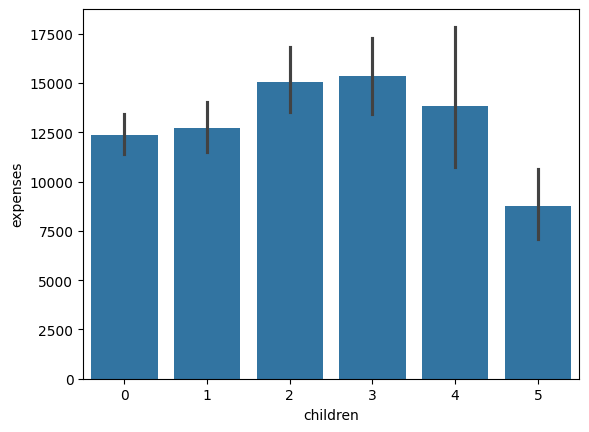

In [95]:
sns.barplot(x=df['children'],y=df['expenses'])

<Axes: xlabel='age', ylabel='expenses'>

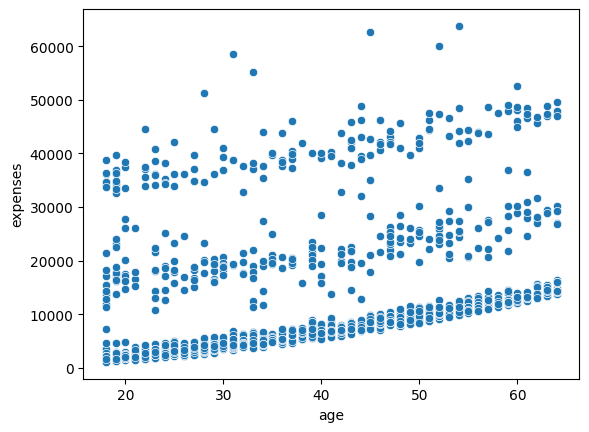

In [98]:
sns.scatterplot(x=df['age'],y=df['expenses'])

In [100]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [103]:
df[num_columns].corr(method='spearman')

,age,bmi,children,expenses
age,1.000000,0.107692,0.056992,0.534392
bmi,0.107692,1.000000,0.015589,0.119419
children,0.056992,0.015589,1.000000,0.133339
expenses,0.534392,0.119419,0.133339,1.000000


In [106]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='expenses'>

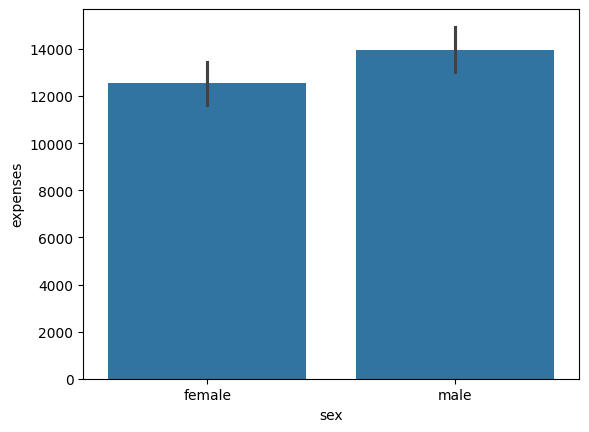

In [108]:
sns.barplot(x=df['sex'],y=df['expenses'])